In [23]:
import numpy as np
import csv
import pandas as pd
from math import*
import matplotlib.pyplot as plt

In [24]:
'''
Generate the X-axis of the polymer molecularweight distribution 
'''
# polymer_molecular_weight_dis_Xaxis_path = r'//ad.monash.edu/home/User001/bzha0080/Desktop/Monash/02. ongoing project/13. Precise polymer synthesis/02. Python code/polymer_molecular_weight_distribution.xlsx'
# rawdata_df =  pd.read_excel(polymer_molecular_weight_dis_Xaxis_path, index_col=0) 
# x_data = list(rawdata_df.iloc[:,0]) 
# print(x_data)

x_data = []
for i in range(20000):
    x_data.append((i+1)*20)
    
print(len(x_data))
print(x_data)


20000
[20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840, 860, 880, 900, 920, 940, 960, 980, 1000, 1020, 1040, 1060, 1080, 1100, 1120, 1140, 1160, 1180, 1200, 1220, 1240, 1260, 1280, 1300, 1320, 1340, 1360, 1380, 1400, 1420, 1440, 1460, 1480, 1500, 1520, 1540, 1560, 1580, 1600, 1620, 1640, 1660, 1680, 1700, 1720, 1740, 1760, 1780, 1800, 1820, 1840, 1860, 1880, 1900, 1920, 1940, 1960, 1980, 2000, 2020, 2040, 2060, 2080, 2100, 2120, 2140, 2160, 2180, 2200, 2220, 2240, 2260, 2280, 2300, 2320, 2340, 2360, 2380, 2400, 2420, 2440, 2460, 2480, 2500, 2520, 2540, 2560, 2580, 2600, 2620, 2640, 2660, 2680, 2700, 2720, 2740, 2760, 2780, 2800, 2820, 2840, 2860, 2880, 2900, 2920, 2940, 2960, 2980, 3000, 3020, 3040, 3060, 3080, 3100, 3120, 3140, 3160, 3180, 3200, 3220, 3240, 3260, 3280, 3300, 3320, 3340, 3360, 3380, 3400, 3420, 3440, 3460, 3480, 35

In [25]:
Mn_lib = {}; D_lib = {}
n = int(input('Please input the number of polymer molecular weight distribution that you want to generate:>>'))
for i in range(n):
    keys = i + 1 
    Mn = int(input(f'Please input the {i} Mn:>>'))
    D = float(input(f'Please input the {i} D:>>'))
    Mn_lib[keys] = Mn
    D_lib[keys] = D
Mn_list = list(Mn_lib.values())
D_list = list(D_lib.values())

print(Mn_list);print(D_list)

[100000, 100000, 5000, 5000, 5000]
[1.3, 1.1, 2.0, 1.3, 1.1]


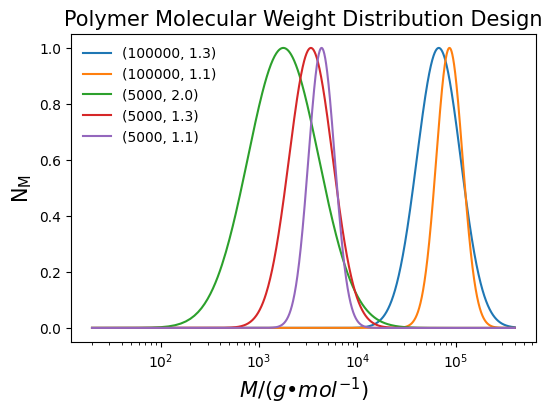

In [40]:
'''
Define the log normal Gaussian Distribution function 
'''
def Gx(x,D,Mn):
    sigma = (np.log(D))**0.5; μ = np.log(Mn) - sigma**2/2
    return (1/(x*sigma*(2*pi)**0.5))*exp(-(np.log(x)-μ)**2/(2*sigma**2))
'''
get the y values from the designed gaussian fitting based on the feed x data, and plot of the curve in one graph
'''
legend_list = []; plot_data = []
y_data_list = [[] for i in range(n)]
y_data_list_normalized = [[] for i in range(n)]
for i in range (n):
    legend = Mn_list[i],D_list[i]
    
    for x in x_data:
        y = Gx(x,D_list[i],Mn_list[i])
        # print(y)
        y_data_list[i].append(y)
    y_data_list_normalized[i] = [float(j)/max(y_data_list[i]) for j in y_data_list[i]] #normalize the y_data 
    plot_data.append((x_data,y_data_list_normalized[i],f'{legend}'))    

plt.figure(figsize = (6,4))
plt.xscale('log')
for data in plot_data:
    plt.plot(data[0],data[1],label = data[2])
plt.legend(loc=0,frameon = False, fontsize = 10)
plt.xlabel('$M/(g\u2022mol^{-1})$', fontsize = 15)
plt.ylabel('$\mathregular{N_{M}}$', fontsize = 15)
plt.title('Polymer Molecular Weight Distribution Design',fontsize = 15)
plt.show()


In [27]:
Mn_designed = []; Mw_designed = []; D_designed = []
for i in range(n):
    niMi = []; Mi_2_ni = []
    for j in range(len(x_data)):
        x = x_data[j]; y = y_data_list_normalized[i][j]
        niMi.append(y*x);Mi_2_ni.append(x**2*y)

    Mn_i_designed = round(sum(niMi)/sum(y_data_list_normalized[i]))
    Mw_i_designed = round(sum(Mi_2_ni)/sum(niMi))
    D_i_designed = round(Mw_i_designed/Mn_i_designed,2)
    Mn_designed.append(Mn_i_designed);Mw_designed.append(Mw_i_designed);D_designed.append(D_i_designed)

print(Mn_designed,Mw_designed,D_designed)



[99438, 99999, 5000, 5000, 5000] [127491, 109998, 10000, 6500, 5500] [1.28, 1.1, 2.0, 1.3, 1.1]


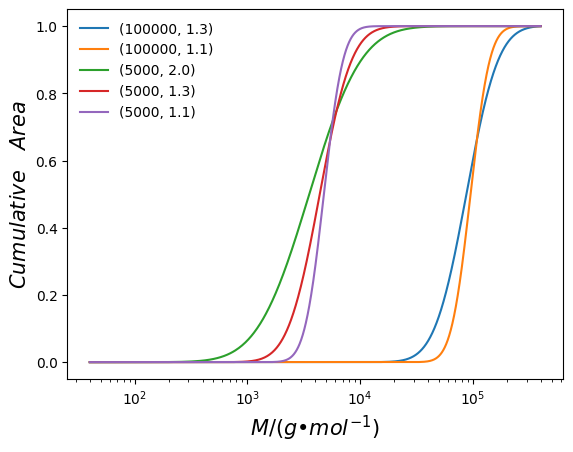

In [28]:
cumulative_area_list = [[] for i in range(n)]; plot_data_cumulative_area = []; total_area_list = []
for i in range(n):
    x_data_cumulative_area = [];cumulative_area = 0
    legend = Mn_list[i],D_list[i]
    for j in range(1,len(x_data)):
        cumulative_area += 0.5*(y_data_list_normalized[i][j]+y_data_list_normalized[i][j-1])*(x_data[j]-x_data[j-1])
    total_area_list.append(cumulative_area)


for i in range(n):
    x_data_cumulative_area = [];cumulative_area = 0
    legend = Mn_list[i],D_list[i]
    for j in range(1,len(x_data)):
        cumulative_area += 0.5*(y_data_list_normalized[i][j]+y_data_list_normalized[i][j-1])*(x_data[j]-x_data[j-1])
        cumulative_area_list[i].append((cumulative_area)/total_area_list[i]); x_data_cumulative_area.append(x_data[j])


    plot_data_cumulative_area.append((x_data_cumulative_area,cumulative_area_list[i],f'{legend}'))  

# plt.figure(figsize = (12,6))
plt.xscale('log')

for data in plot_data_cumulative_area:
    plt.plot(data[0],data[1],label = data[2])
plt.legend(loc=0,frameon = False, fontsize = 10)
plt.xlabel('$M/(g\u2022mol^{-1})$', fontsize = 15)
plt.ylabel('$Cumulative\quadArea$', fontsize = 15)
# plt.title('Polymer Molecular Weight Distribution Design',fontsize = 15)
plt.show() 



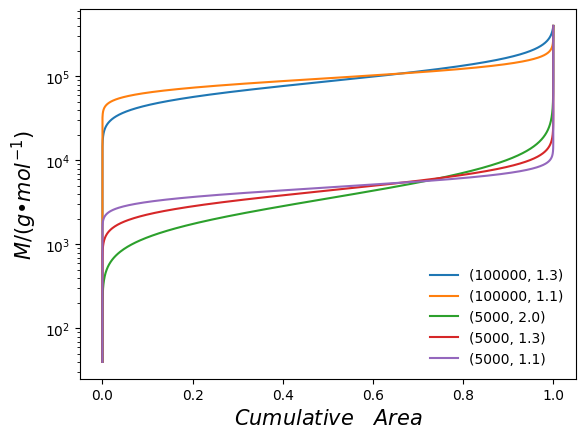

In [38]:
# plt.figure(figsize = (12,6))
plt.yscale('log')

for data in plot_data_cumulative_area:
    plt.plot(data[1],data[0],label = data[2])
 
plt.legend(loc=0,frameon = False, fontsize = 10)
plt.ylabel('$M/(g\u2022mol^{-1})$', fontsize = 15)
plt.xlabel('$Cumulative\quadArea$', fontsize = 15)
# plt.title('Polymer Molecular Weight Distribution Design',fontsize = 15)
plt.show() 

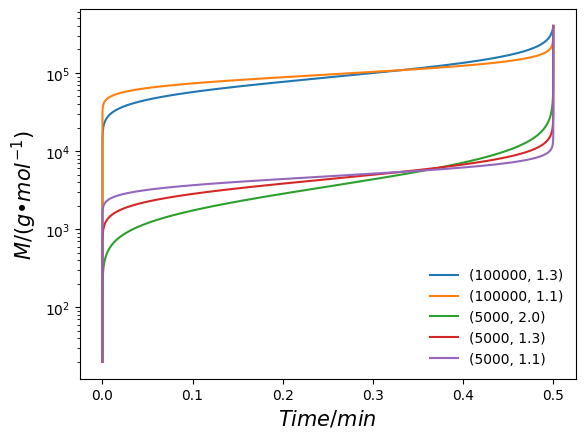

[[1.0191707584276998e-50, 7.233127209566004e-46, 1.3696829233730281e-42, 3.8603804796019444e-40, 3.403589162365051e-38, 1.3795975265143936e-36, 3.212093036965928e-35, 4.937831680211154e-34, 5.4982114595498957e-33, 4.730816794662468e-32, 3.2967935863587276e-31, 1.9275332292430005e-30, 9.715389467283238e-30, 4.312691167777414e-29, 1.7151587036719676e-28, 6.196992448001379e-28, 2.0576406030741833e-27, 6.339182305839582e-27, 1.8267539143643023e-26, 4.9578373163905014e-26, 1.2747523731554484e-25, 3.120951794016725e-25, 7.307907954625549e-25, 1.6429320880804736e-24, 3.5582751245038975e-24, 7.446527897588994e-24, 1.5097919091523275e-23, 2.972750188209051e-23, 5.696376182555623e-23, 1.0643022236581017e-22, 1.9422398941060637e-22, 3.4672610567329073e-22, 6.063557588200578e-22, 1.0401166724561039e-21, 1.7520948915169206e-21, 2.9014710814566878e-21, 4.728129092807928e-21, 7.58860120068616e-21, 1.200591834479376e-20, 1.873796435334953e-20, 2.8870204579141e-20, 4.394021450699459e-20, 6.610332073640

In [37]:
'''
convert the Cumulative Area to total reaction time
'''
t_total_reaction = 0.5 # unit is in minute

total_time_list = [[] for i in range(n)]; plot_data_Mw_time = []

for i in range(n):
    legend = Mn_list[i],D_list[i]; x_data_Mw =[]
    for j in range(len(cumulative_area_list[i])):
        time = t_total_reaction*cumulative_area_list[i][j]
        total_time_list[i].append(time);x_data_Mw.append(x_data[j])
    
    plot_data_Mw_time.append((total_time_list[i],x_data_Mw,f'{legend}'))  

# plt.figure(figsize = (12,6))
plt.yscale('log')

for data in plot_data_Mw_time:
    plt.plot(data[0],data[1],label = data[2])
plt.legend(loc=0,frameon = False, fontsize = 10)
plt.ylabel('$M/(g\u2022mol^{-1})$', fontsize = 15)
plt.xlabel('$Time/min$', fontsize = 15)
# plt.title('Polymer Molecular Weight Distribution Design',fontsize = 15)
plt.show() 
print(total_time_list)

[0.0005550698694198132, 0.0011101397388396264, 0.0016652096082594395, 0.002220279477679253, 0.002775349347099066, 0.003330419216518879, 0.0038854890859386926, 0.004440558955358506, 0.004995628824778319, 0.005550698694198132, 0.006105768563617945, 0.006660838433037758, 0.007215908302457572, 0.007770978171877385, 0.008326048041297197, 0.008881117910717011, 0.009436187780136825, 0.009991257649556638, 0.010546327518976452, 0.011101397388396264, 0.011656467257816076, 0.01221153712723589, 0.012766606996655704, 0.013321676866075516, 0.01387674673549533, 0.014431816604915144, 0.014986886474334958, 0.01554195634375477, 0.016097026213174583, 0.016652096082594395, 0.01720716595201421, 0.017762235821434023, 0.018317305690853835, 0.01887237556027365, 0.019427445429693463, 0.019982515299113275, 0.020537585168533087, 0.021092655037952903, 0.021647724907372715, 0.022202794776792528, 0.022757864646212343, 0.023312934515632152, 0.023868004385051968, 0.02442307425447178, 0.024978144123891596, 0.025533213

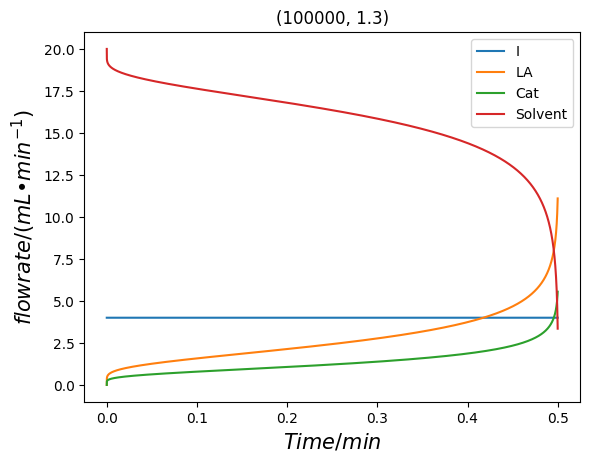

[0.0005550698694198132, 0.0011101397388396264, 0.0016652096082594395, 0.002220279477679253, 0.002775349347099066, 0.003330419216518879, 0.0038854890859386926, 0.004440558955358506, 0.004995628824778319, 0.005550698694198132, 0.006105768563617945, 0.006660838433037758, 0.007215908302457572, 0.007770978171877385, 0.008326048041297197, 0.008881117910717011, 0.009436187780136825, 0.009991257649556638, 0.010546327518976452, 0.011101397388396264, 0.011656467257816076, 0.01221153712723589, 0.012766606996655704, 0.013321676866075516, 0.01387674673549533, 0.014431816604915144, 0.014986886474334958, 0.01554195634375477, 0.016097026213174583, 0.016652096082594395, 0.01720716595201421, 0.017762235821434023, 0.018317305690853835, 0.01887237556027365, 0.019427445429693463, 0.019982515299113275, 0.020537585168533087, 0.021092655037952903, 0.021647724907372715, 0.022202794776792528, 0.022757864646212343, 0.023312934515632152, 0.023868004385051968, 0.02442307425447178, 0.024978144123891596, 0.025533213

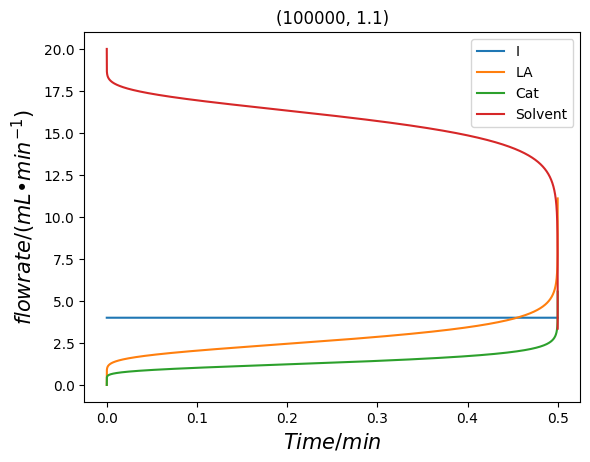

[0.0005550698694198132, 0.0011101397388396264, 0.0016652096082594395, 0.002220279477679253, 0.002775349347099066, 0.003330419216518879, 0.0038854890859386926, 0.004440558955358506, 0.004995628824778319, 0.005550698694198132, 0.006105768563617945, 0.006660838433037758, 0.007215908302457572, 0.007770978171877385, 0.008326048041297197, 0.008881117910717011, 0.009436187780136825, 0.009991257649556638, 0.010546327518976452, 0.011101397388396264, 0.011656467257816076, 0.01221153712723589, 0.012766606996655704, 0.013321676866075516, 0.01387674673549533, 0.014431816604915144, 0.014986886474334958, 0.01554195634375477, 0.016097026213174583, 0.016652096082594395, 0.01720716595201421, 0.017762235821434023, 0.018317305690853835, 0.01887237556027365, 0.019427445429693463, 0.019982515299113275, 0.020537585168533087, 0.021092655037952903, 0.021647724907372715, 0.022202794776792528, 0.022757864646212343, 0.023312934515632152, 0.023868004385051968, 0.02442307425447178, 0.024978144123891596, 0.025533213

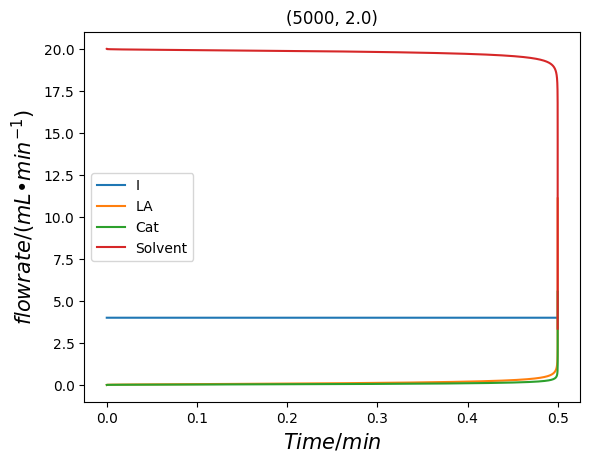

[0.0005550698694198132, 0.0011101397388396264, 0.0016652096082594395, 0.002220279477679253, 0.002775349347099066, 0.003330419216518879, 0.0038854890859386926, 0.004440558955358506, 0.004995628824778319, 0.005550698694198132, 0.006105768563617945, 0.006660838433037758, 0.007215908302457572, 0.007770978171877385, 0.008326048041297197, 0.008881117910717011, 0.009436187780136825, 0.009991257649556638, 0.010546327518976452, 0.011101397388396264, 0.011656467257816076, 0.01221153712723589, 0.012766606996655704, 0.013321676866075516, 0.01387674673549533, 0.014431816604915144, 0.014986886474334958, 0.01554195634375477, 0.016097026213174583, 0.016652096082594395, 0.01720716595201421, 0.017762235821434023, 0.018317305690853835, 0.01887237556027365, 0.019427445429693463, 0.019982515299113275, 0.020537585168533087, 0.021092655037952903, 0.021647724907372715, 0.022202794776792528, 0.022757864646212343, 0.023312934515632152, 0.023868004385051968, 0.02442307425447178, 0.024978144123891596, 0.025533213

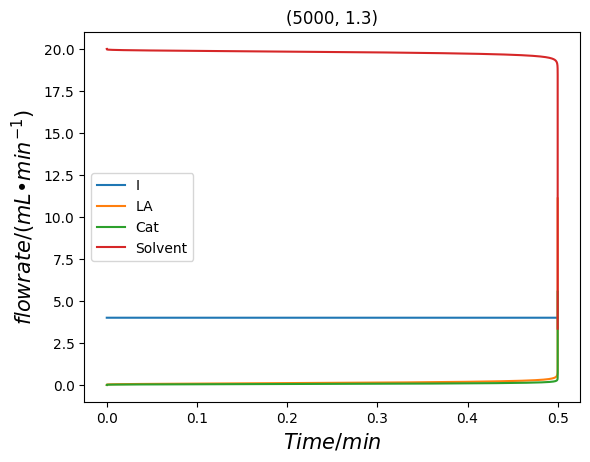

[0.0005550698694198132, 0.0011101397388396264, 0.0016652096082594395, 0.002220279477679253, 0.002775349347099066, 0.003330419216518879, 0.0038854890859386926, 0.004440558955358506, 0.004995628824778319, 0.005550698694198132, 0.006105768563617945, 0.006660838433037758, 0.007215908302457572, 0.007770978171877385, 0.008326048041297197, 0.008881117910717011, 0.009436187780136825, 0.009991257649556638, 0.010546327518976452, 0.011101397388396264, 0.011656467257816076, 0.01221153712723589, 0.012766606996655704, 0.013321676866075516, 0.01387674673549533, 0.014431816604915144, 0.014986886474334958, 0.01554195634375477, 0.016097026213174583, 0.016652096082594395, 0.01720716595201421, 0.017762235821434023, 0.018317305690853835, 0.01887237556027365, 0.019427445429693463, 0.019982515299113275, 0.020537585168533087, 0.021092655037952903, 0.021647724907372715, 0.022202794776792528, 0.022757864646212343, 0.023312934515632152, 0.023868004385051968, 0.02442307425447178, 0.024978144123891596, 0.025533213

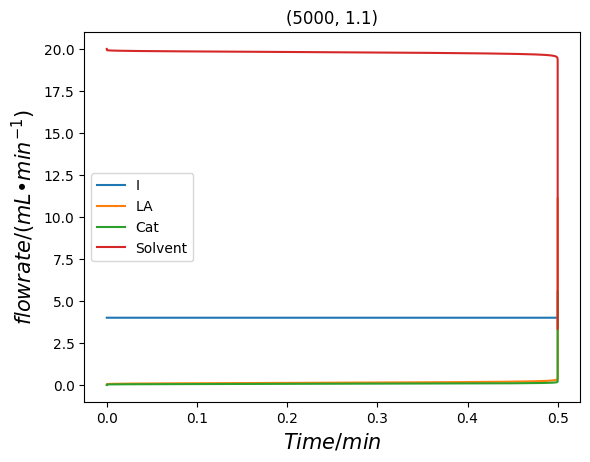

In [50]:
V_reactor = 2 # ml
tres = 5 # second
total_flow = V_reactor*60/tres
Mw_LA = 144.126
C_LA = 1; C_I = 0.001; C_Cat = 0.01;flow_I = 4

for i in range (n):
   tittle = Mn_list[i],D_list[i]; flow_LA_list = []; flow_Cat_list = []; flow_I_list = []; flow_solvent_list = [];time_flow_list = []
   for j in range(len((total_time_list[i]))):
      flow_LA = flow_I*x_data[j]*C_I/(Mw_LA*C_LA)
      flow_Cat = flow_LA*C_LA/(200*C_Cat)
      time_flow = total_time_list[i][j]
      flow_solvent = total_flow - flow_I-flow_Cat-flow_LA
      flow_I_list.append(flow_I);flow_Cat_list.append(flow_Cat);flow_LA_list.append(flow_LA); flow_solvent_list.append(flow_solvent)
      time_flow_list.append(time_flow)
   
   print(flow_LA_list)
   print(flow_I_list)
   print(flow_Cat_list)
   print(flow_solvent_list)

   plt.plot(time_flow_list,flow_I_list)
   plt.plot(time_flow_list,flow_LA_list)
   plt.plot(time_flow_list,flow_Cat_list)
   plt.plot(time_flow_list,flow_solvent_list)
   plt.ylabel('$flowrate/(mL\u2022min^{-1})$', fontsize = 15)
   plt.xlabel('$Time/min$', fontsize = 15)
   plt.legend(['I','LA','Cat','Solvent'])
   plt.title(f'{tittle}')
   plt.show()

